<a href="https://colab.research.google.com/github/ashish244co/FastAiDeepLearning/blob/master/FastAILesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install fastai

In [1]:
!nvidia-smi

Sun Apr 26 23:56:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
from fastai.metrics import *

In [6]:
help(URLs)

Help on class URLs in module fastai.datasets:

class URLs(builtins.object)
 |  Global constants for dataset and model URLs.
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  ADULT_SAMPLE = 'http://files.fast.ai/data/examples/adult_sample'
 |  
 |  AG_NEWS = 'https://s3.amazonaws.com/fast-ai-nlp/ag_news_csv'
 |  
 |  AMAZON_REVIEWS = 'https://s3.amazonaws.com/fast-ai-nlp/amazon_review_f...
 |  
 |  AMAZON_REVIEWS_POLARITY = 'https://s3.amazonaws.com/fast-ai-nlp/amazon...
 |  
 |  BIWI_HEAD_POSE = 'https://s3.amazonaws.com/fast-ai-imagelocal/biwi_hea...
 |  
 |  BIWI_SAMPLE = 'http://files.fast.ai/data/examples/biwi_sample'
 |  
 |  CALTECH_101 = 'https://s3.amazonaws.com/fast-ai-imageclas/caltech_101'
 |  
 |  CAMVI

In [49]:
cifar = untar_data(URLs.CIFAR)
cifar_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [51]:
cifar.ls()

[PosixPath('/root/.fastai/data/cifar10/train'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt'),
 PosixPath('/root/.fastai/data/cifar10/test')]

In [0]:
data = ImageDataBunch.from_folder(cifar,train='train',valid='test',ds_tfms=cifar_tfms,)

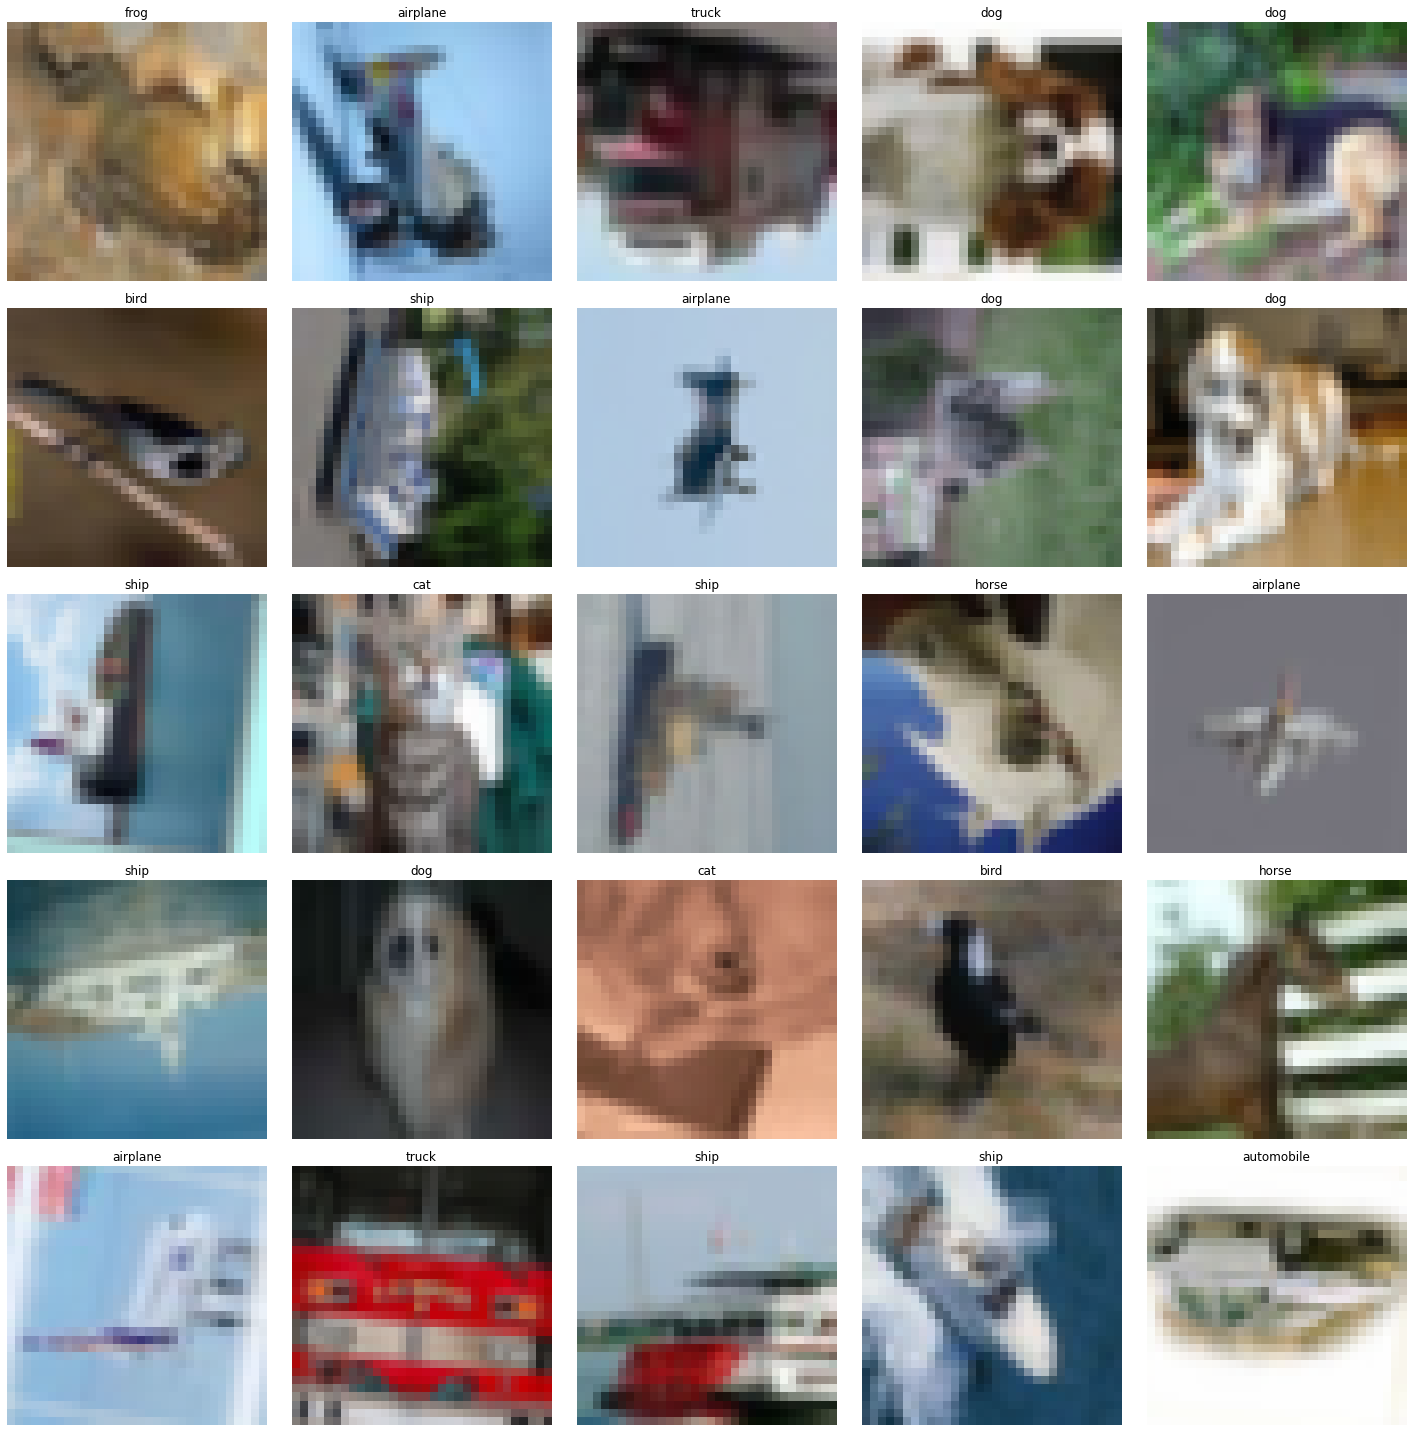

In [53]:
data.show_batch()

In [54]:
data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [56]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [57]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.842739,1.786063,0.566000,01:19
1,1.478769,1.384409,0.480600,01:18
2,1.284825,1.180553,0.416900,01:19
3,1.167894,1.105864,0.394000,01:19
4,1.154379,1.084803,0.383200,01:19


In [0]:
learn.unfreeze()

In [59]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


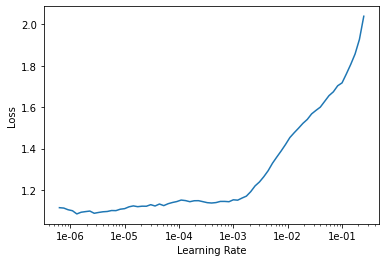

In [60]:
learn.recorder.plot()

In [61]:
learn.fit_one_cycle(5,slice(1e-07,1e-6))

epoch,train_loss,valid_loss,error_rate,time
0,1.156874,1.088577,0.387500,01:29
1,1.130633,1.091253,0.385500,01:29
2,1.136196,1.100909,0.386400,01:29
3,1.123816,1.079711,0.380500,01:29
4,1.139263,1.093959,0.380700,01:29


In [45]:
doc(ClassificationInterpretation)

In [62]:
interp = ClassificationInterpretation.from_learner(learn)

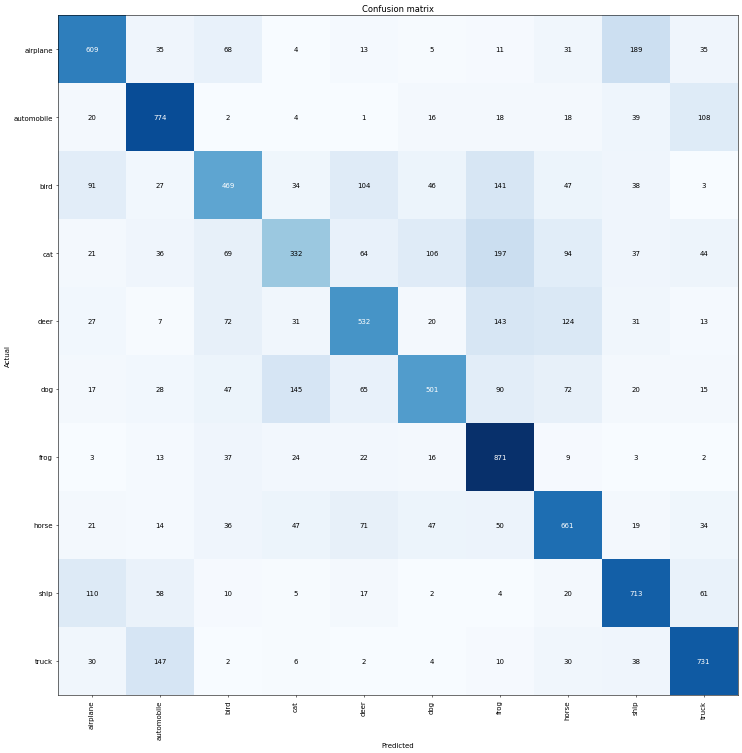

In [66]:
interp.plot_confusion_matrix(figsize=(15,15),dpi=50)

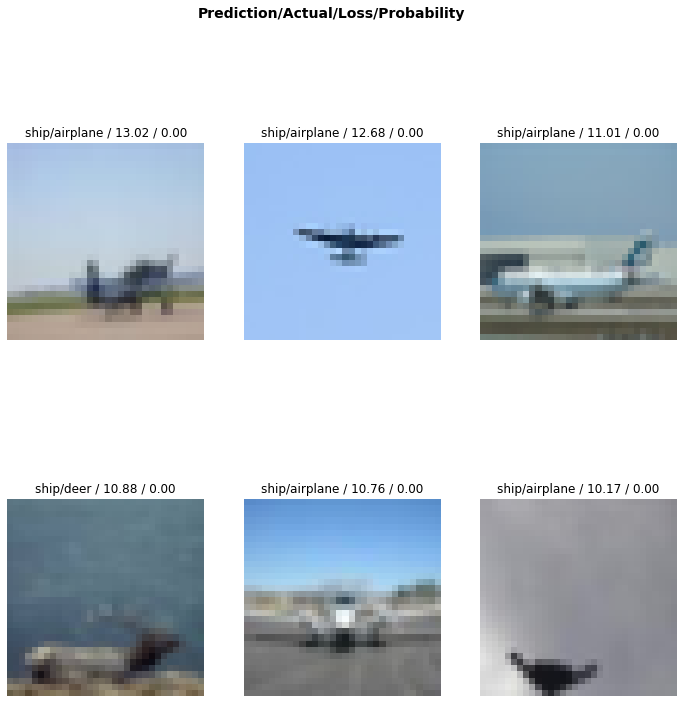

In [80]:
interp.plot_top_losses(k=6)

In [0]:
learn.save('stage1')

In [0]:
import matplotlib.pyplot as plt

(Category cat,
 tensor(3),
 tensor([0.0127, 0.0005, 0.1234, 0.4283, 0.1766, 0.1636, 0.0093, 0.0770, 0.0072,
         0.0014]))

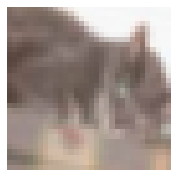

In [94]:
img = learn.data.train_ds[100][0]
img.show()
learn.predict(img)

In [95]:
print(learn.data.train_ds[100][1])

cat
